In [14]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

dataset=pd.read_csv("breastCancer_processed.csv")
dataset.head()

,numara,yigin_kalinligi,hucre_boyutu_esbicim,hucre_sekil_esbicim,marjinal_yapisma,tek_epitel_hucre_boyut,ciplak_cekirdekler,yumusak_kromatin,normal_nukleoli,mitoz,sinif
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [15]:
x = dataset.drop(["sinif","numara"],axis=1).values
y = dataset["sinif"].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state = 9)

In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
y_pred = classifier.predict(X_test)
cm_nb = confusion_matrix(y_test, y_pred)
print(cm_nb)
accuracy_nb = accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))
print(f"acc_score = {accuracy_nb}")

[[104   1]
 [  7  59]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       105
           1       0.98      0.89      0.94        66

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

acc_score = 0.9532163742690059


model 1 AUC score: 0.9422077922077923


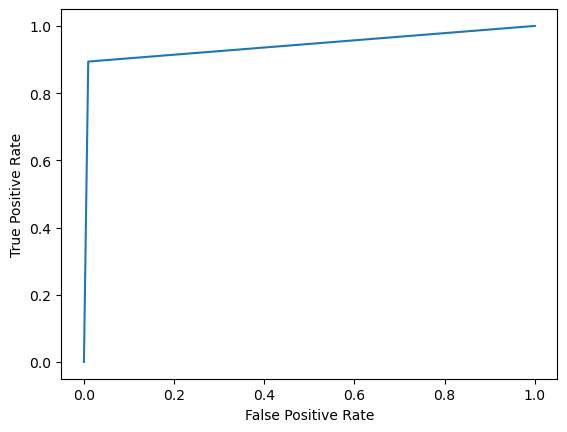

In [20]:
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate') 

plot_roc_curve(y_test, y_pred)
print(f'model 1 AUC score: {roc_auc_score(y_test, y_pred)}') 